In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
kickstarter = pd.read_csv('kickstarter_04_25_19_ready_for_modeling.csv')

In [3]:
# Checking for class imbalance

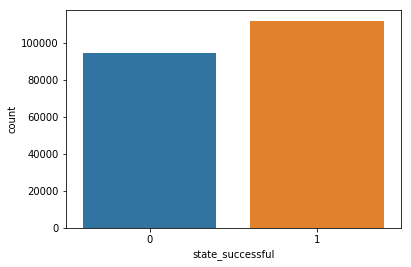

In [4]:
sns.countplot(kickstarter['state_successful'])

In [5]:
kickstarter['state_successful'].value_counts()

1    112120
0     94929
Name: state_successful, dtype: int64

In [6]:
kickstarter.shape

(207049, 24)

In [7]:
percent_success = 112120/207049
percent_fail = 94929/207049
print(percent_success)
print(percent_fail)

0.5415143275263343
0.4584856724736657


In [8]:
# the classes appear to be pretty well balanced already so we're going to proceed.

In [9]:
kickstarter.columns

Index(['id', 'slug', 'state_successful', 'goal', 'staff_pick_True',
       'cam_length', 'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater', 'location', 'child_category'],
      dtype='object')

In [10]:
X = kickstarter[['goal', 'staff_pick_True',
       'cam_length', 'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater']]
y = kickstarter['state_successful']

In [11]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
X.shape, y.shape

((207049, 19), (207049,))

In [13]:
X_mid, X_test, y_mid, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42, stratify = y)

In [ ]:
X_mid.shape, y_mid.shape, X_test.shape, y_test.shape

((165639, 19), (165639,), (41410, 19), (41410,))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_mid, y_mid, test_size=0.25, random_state=42, stratify = y_mid)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((124229, 19), (124229,), (41410, 19), (41410,))

In [ ]:
# running the training data through all the models with default parameters for comparison

### KNN ###

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
knn_pred = knn.predict(X_val)

In [ ]:
print('KNN Results:')
print(confusion_matrix(y_val,knn_pred))
print(classification_report(y_val, knn_pred))
print('KNN score: %f' % knn.fit(X_train, y_train).score(X_val, y_val))

KNN Results:
[[11500  7486]
 [ 6318 16106]]
              precision    recall  f1-score   support

           0       0.65      0.61      0.62     18986
           1       0.68      0.72      0.70     22424

   micro avg       0.67      0.67      0.67     41410
   macro avg       0.66      0.66      0.66     41410
weighted avg       0.67      0.67      0.67     41410



In [ ]:
knn_y_score = knn.predict_proba(X_val)[:, 1]
knn_fpr, knn_tpr, knn_auc_thresholds = roc_curve(y_val, knn_y_score)
roc_auc_knn = auc(knn_fpr, knn_tpr)
print(auc(knn_fpr, knn_tpr))

In [ ]:
plt.figure()
lw = 2
plt.plot(knn_fpr, knn_tpr, color='darkorange',
         lw=lw, label='KNN curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression ###

In [ ]:
logistic = LogisticRegression()

In [ ]:
logistic.fit(X_train, y_train)

In [ ]:
logistic_pred = logistic.predict(X_val)

In [ ]:
print('Logistic Results:')
print(confusion_matrix(y_val,logistic_pred))
print(classification_report(y_val, logistic_pred))
print('Logistic score: %f' % logistic.fit(X_train, y_train).score(X_val, y_val))

In [ ]:
logistic_y_score = logistic.predict_proba(X_val)[:, 1]
logistic_fpr, logistic_tpr, logistic_auc_thresholds = roc_curve(y_val, logistic_y_score)
roc_auc_logistic = auc(logistic_fpr, logistic_tpr)
print(auc(logistic_fpr, logistic_tpr))

In [ ]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(knn_fpr, knn_tpr, color='darkorange',
         lw=lw, label='KNN curve (area = %0.2f)' % roc_auc_knn)
plt.plot(logistic_fpr, logistic_tpr, color='darkblue',
         lw=lw, label='Logistic curve (area = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

### Naive Bayes ###

In [ ]:
gaussian = naive_bayes.GaussianNB()
bernoulli = naive_bayes.BernoulliNB()

In [ ]:
gaussian.fit(X_train, y_train)

In [ ]:
gaussian_pred = gaussian.predict(X_val)

In [ ]:
print('Gaussian Results:')
print(confusion_matrix(y_val,gaussian_pred))
print(classification_report(y_val, gaussian_pred))
print('Gaussian score: %f' % gaussian.fit(X_train, y_train).score(X_val, y_val))

In [ ]:
gaussian_y_score = gaussian.predict_proba(X_val)[:, 1]
gaussian_fpr, gaussian_tpr, auc_thresholds = roc_curve(y_val, gaussian_y_score)
roc_auc_gaussian = auc(gaussian_fpr, gaussian_tpr)
print(auc(gaussian_fpr, gaussian_tpr))

In [ ]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(knn_fpr, knn_tpr, color='darkorange',
         lw=lw, label='KNN curve (area = %0.2f)' % roc_auc_knn)
plt.plot(logistic_fpr, logistic_tpr, color='darkblue',
         lw=lw, label='Logistic curve (area = %0.2f)' % roc_auc_logistic)
plt.plot(gaussian_fpr, gaussian_tpr, color='darkred',
         lw=lw, label='Gaussian NB (area = %0.2f)' % roc_auc_gaussian)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [ ]:
bernoulli.fit(X_train, y_train)

In [ ]:
bernoulli_pred = bernoulli.predict(X_val)

In [ ]:
print('Bernoulli Results:')
print(confusion_matrix(y_val,bernoulli_pred))
print(classification_report(y_val, bernoulli_pred))
print('Bernoulli score: %f' % bernoulli.fit(X_train, y_train).score(X_val, y_val))

In [ ]:
bernoulli_y_score = bernoulli.predict_proba(X_val)[:, 1]
bernoulli_fpr, bernoulli_tpr, auc_thresholds = roc_curve(y_val, bernoulli_y_score)
roc_auc_bernoulli = auc(bernoulli_fpr, bernoulli_tpr)
print(auc(bernoulli_fpr, bernoulli_tpr))

In [ ]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logistic_fpr, logistic_tpr, color='darkblue',
         lw=lw, label='Logistic curve (area = %0.2f)' % roc_auc_logistic)
plt.plot(gaussian_fpr, gaussian_tpr, color='darkred',
         lw=lw, label='Gaussian NB (area = %0.2f)' % roc_auc_gaussian)
plt.plot(bernoulli_fpr, bernoulli_tpr, color='black',
         lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli)
plt.plot(knn_fpr, knn_tpr, color='darkorange',
         lw=lw, label='KNN curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

### Decision Tree ###

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train, y_train)

In [ ]:
tree_pred = tree.predict(X_val)

In [ ]:
print('Tree Results:')
print(confusion_matrix(y_val, tree_pred))
print(classification_report(y_val, tree_pred))
print('Tree score: %f' % tree.fit(X_train, y_train).score(X_val, y_val))

In [ ]:
tree_y_score = tree.predict_proba(X_val)[:, 1]
tree_fpr, tree_tpr, auc_thresholds = roc_curve(y_val, tree_y_score)
roc_auc_tree = auc(tree_fpr, tree_tpr)
print(auc(tree_fpr, tree_tpr))

In [ ]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logistic_fpr, logistic_tpr, color='darkblue',
         lw=lw, label='Logistic curve (area = %0.2f)' % roc_auc_logistic)
plt.plot(bernoulli_fpr, bernoulli_tpr, color='black',
         lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli)
plt.plot(gaussian_fpr, gaussian_tpr, color='darkred',
         lw=lw, label='Gaussian NB (area = %0.2f)' % roc_auc_gaussian)
plt.plot(knn_fpr, knn_tpr, color='darkorange',
         lw=lw, label='KNN curve (area = %0.2f)' % roc_auc_knn)
plt.plot(tree_fpr, tree_tpr, color='brown',
         lw=lw, label='Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

### Random Forest ###

In [ ]:
forest = RandomForestClassifier()

In [ ]:
forest.fit(X_train, y_train)

In [ ]:
forest_pred = forest.predict(X_val)

In [ ]:
print('Forest Results:')
print(confusion_matrix(y_val, tree_pred))
print(classification_report(y_val, forest_pred))
print('Forest score: %f' % forest.fit(X_train, y_train).score(X_val, y_val))

In [ ]:
forest_y_score = forest.predict_proba(X_val)[:, 1]
forest_fpr, forest_tpr, auc_thresholds = roc_curve(y_val, forest_y_score)
roc_auc_forest = auc(forest_fpr, forest_tpr)
print(auc(forest_fpr, forest_tpr))

In [ ]:
plt.figure(figsize=(10,10))
lw = 2

plt.plot(logistic_fpr, logistic_tpr, color='blue',
         lw=lw, label='Logistic curve (area = %0.2f)' % roc_auc_logistic)
plt.plot(bernoulli_fpr, bernoulli_tpr, color='black',
         lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli)
plt.plot(gaussian_fpr, gaussian_tpr, color='red',
         lw=lw, label='Gaussian NB (area = %0.2f)' % roc_auc_gaussian)
plt.plot(forest_fpr, forest_tpr, color='purple',
         lw=lw, label='Random Forest (AUC = %0.2f)' % roc_auc_forest)
plt.plot(knn_fpr, knn_tpr, color='orange',
         lw=lw, label='KNN curve (area = %0.2f)' % roc_auc_knn)
plt.plot(tree_fpr, tree_tpr, color='brown',
         lw=lw, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15,15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

### SVM ###

In [ ]:
SVC = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
SVC.fit(X_train, y_train)

In [ ]:
SVC_pred = SVC.predict(X_val)

In [ ]:
print('SVC Results:')
print(confusion_matrix(y_val, SVC_pred))
print(classification_report(y_val, SVC_pred))
print('SVC score: %f' % SVC.fit(X_train, y_train).score(X_val, y_val))

SVC Results:
[[11222  7764]
 [ 5288 17136]]
              precision    recall  f1-score   support

           0       0.68      0.59      0.63     18986
           1       0.69      0.76      0.72     22424

   micro avg       0.68      0.68      0.68     41410
   macro avg       0.68      0.68      0.68     41410
weighted avg       0.68      0.68      0.68     41410

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
SVC score: 0.684810

In [ ]:
#from sklearn.calibration import CalibratedClassifierCV
#clf = CalibratedClassifierCV(SVC)
#clf.fit(X_train, y_train)
#CalibratedClassifierCV(base_estimator=SVC())

In [ ]:
#SVC.probability = True

In [ ]:
SVC_y_score = SVC.predict_proba(X_val)[:, 1]

In [ ]:
SVC_fpr, SVC_tpr, auc_thresholds = roc_curve(y_val, SVC_y_score)
roc_auc_SVC = auc(SVC_fpr, SVC_tpr)
print(auc(SVC_fpr, SVC_tpr))

In [ ]:
fig = plt.figure(figsize=(14,14))
lw = 2

plt.plot(logistic_fpr, logistic_tpr, color='darkblue',
         lw=lw, label='Logistic curve (AUC = %0.2f)' % roc_auc_logistic)
plt.plot(bernoulli_fpr, bernoulli_tpr, color='black',
         lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli)
plt.plot(SVC_fpr, SVC_tpr, color='green',
         lw=lw, label='SVM (AUC = %0.2f)' % roc_auc_SVC)
plt.plot(gaussian_fpr, gaussian_tpr, color='darkred',
         lw=lw, label='Gaussian NB (AUC = %0.2f)' % roc_auc_gaussian)
plt.plot(forest_fpr, forest_tpr, color='purple',
         lw=lw, label='Random Forest (AUC = %0.2f)' % roc_auc_forest)
plt.plot(knn_fpr, knn_tpr, color='darkorange',
         lw=lw, label='KNN curve (AUC = %0.2f)' % roc_auc_knn)
plt.plot(tree_fpr, tree_tpr, color='brown',
         lw=lw, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate',fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('ROC Curves', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.tight_layout()
#plt.savefig('roc_curves_all.png')
#plt.savefig('roc_curves_svg_all.svg')
plt.show()

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
xgBoost = XGBClassifier()

In [ ]:
xgBoost.fit(X_train, y_train)

In [ ]:
xgBoost_pred = xgBoost.predict(X_val)

In [ ]:
print('XGBoost Results:')
print(confusion_matrix(y_val, xgBoost_pred))
print(classification_report(y_val, xgBoost_pred))
print('XGBoost score: %f' % xgBoost.fit(X_train, y_train).score(X_val, y_val))

In [ ]:
xgBoost_y_score = xgBoost.predict_proba(X_val)[:, 1]

In [ ]:
xgBoost_fpr, xgBoost_tpr, auc_thresholds = roc_curve(y_val, xgBoost_y_score)
roc_auc_xgBoost = auc(xgBoost_fpr, xgBoost_tpr)
print(auc(xgBoost_fpr, xgBoost_tpr))

In [ ]:
fig = plt.figure(figsize=(14,14))
lw = 2

plt.plot(xgBoost_fpr, xgBoost_tpr, color='green',
         lw=lw, label='XGBoost (AUC = %0.2f)' % roc_auc_xgBoost)
plt.plot(logistic_fpr, logistic_tpr, color='darkblue',
         lw=lw, label='Logistic curve (AUC = %0.2f)' % roc_auc_logistic)
plt.plot(bernoulli_fpr, bernoulli_tpr, color='black',
         #lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli)
plt.plot(SVC_fpr, SVC_tpr, color='green',
         #lw=lw, label='SVM (AUC = %0.2f)' % roc_auc_SVC)
plt.plot(gaussian_fpr, gaussian_tpr, color='darkred',
         #lw=lw, label='Gaussian NB (AUC = %0.2f)' % roc_auc_gaussian)
plt.plot(forest_fpr, forest_tpr, color='purple',
         #lw=lw, label='Random Forest (AUC = %0.2f)' % roc_auc_forest)
plt.plot(knn_fpr, knn_tpr, color='darkorange',
         #lw=lw, label='KNN curve (AUC = %0.2f)' % roc_auc_knn)
plt.plot(tree_fpr, tree_tpr, color='brown',
         #lw=lw, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate',fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('ROC Curves', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.tight_layout()
plt.savefig('roc_curves_all_ALL.png')
#plt.savefig('roc_curves_svg_all.svg')
plt.show()

In [ ]:
max_depth = [3,4,5,6,7,8,9,10]
min_child_weight = [1,2,3,4,5,6,7,8,9,10,11]


param_grid = dict(max_depth = max_depth, min_child_weight=min_child_weight)
xgBoost_grid_search = XGBClassifier()
xgBoost_grid = GridSearchCV(xgBoost_grid_search, param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)
xgBoost_grid.fit(X_train, y_train)
xgBoost_grid_predictions = xgBoost_grid.predict(X_val)
xgBoost_best_params = xgBoost_grid.best_params_
xgBoost_best_estimator = xgBoost_grid.best_estimator_
xgBoost_best_cm = confusion_matrix(y_val,xgBoost_grid_predictions)
xgBoost_best_cr = classification_report(y_val,xgBoost_grid_predictions)
print(xgBoost_best_params, xgBoost_best_estimator, xgBoost_best_cm, xgBoost_best_cr)

In [ ]:
xgBoost_y_score = xgBoost_grid.predict_proba(X_val)[:, 1]

In [ ]:
xgBoost_grid_fpr, xgBoost_grid_tpr, auc_thresholds = roc_curve(y_val, xgBoost_grid_y_score)
roc_auc_xgBoost_grid = auc(xgBoost_grid_fpr, xgBoost_grid_tpr)
print(auc(xgBoost_grid_fpr, xgBoost_grid_tpr))